In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [6]:
dataset=pd.read_csv('C:\\Users\\madhu\\Desktop\\ACM\\House price prediction.zip')

In [7]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [8]:
y = dataset.price
features= ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built']
X=dataset[features]

In [9]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
0,3.0,1.50,1340,7912,1.5,1955
1,5.0,2.50,3650,9050,2.0,1921
2,3.0,2.00,1930,11947,1.0,1966
3,3.0,2.25,2000,8030,1.0,1963
4,4.0,2.50,1940,10500,1.0,1976


In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

In [11]:
X.shape

(4600, 6)

In [12]:
X_train.shape


(3680, 6)

In [13]:
X_test.shape

(920, 6)

In [14]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_b = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]

In [17]:
theta = np.random.randn(X_train_b.shape[1], 1)
learning_rate = 0.01
n_iterations = 1000

In [18]:
# Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/len(X_train_b) * X_train_b.T.dot(X_train_b.dot(theta) - y_train.values.reshape(-1, 1))
    theta = theta - learning_rate * gradients

# Display the results
print("Intercept:", theta[0][0])
print("Slope:", theta[1:])

Intercept: 557609.6761464234
Slope: [[-58255.64004496]
 [ 50446.52141465]
 [264703.63627459]
 [-23703.61256353]
 [ 18374.95720178]
 [-81891.84946508]]


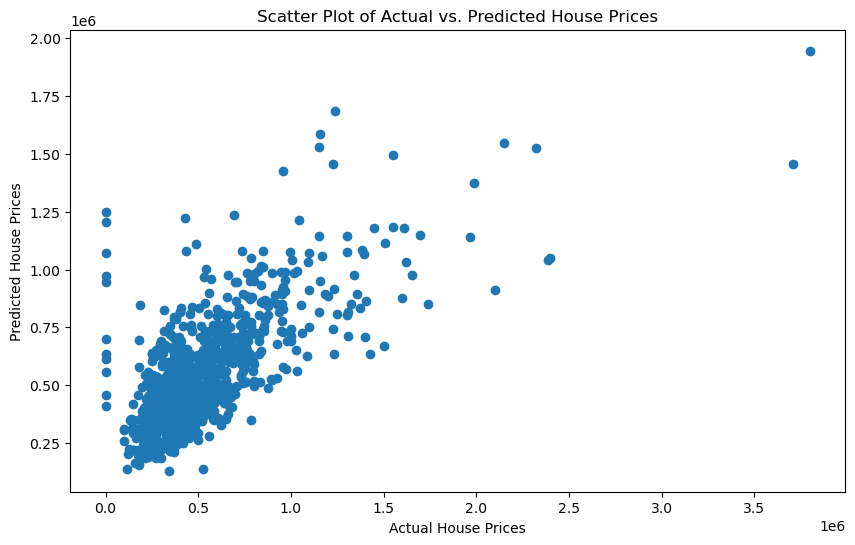

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.title("Scatter Plot of Actual vs. Predicted House Prices")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.show()

In [26]:
X_test_b = np.c_[np.ones((len(X_test_scaled), 1)), X_test_scaled]
predictions = X_test_b.dot(theta)
print(predictions)

[[ 504446.937665  ]
 [ 712142.62065498]
 [ 282426.62096622]
 [ 655742.3181978 ]
 [ 670796.06270188]
 [ 605440.22303453]
 [ 264300.02709413]
 [ 314143.42652954]
 [ 460149.51649598]
 [ 533946.59669731]
 [ 435584.70013434]
 [ 289025.80229531]
 [ 348371.34673731]
 [ 722605.85413882]
 [ 240440.21664054]
 [ 573916.04361458]
 [ 588488.54518217]
 [ 468698.32373773]
 [ 454223.00634787]
 [ 572437.03665357]
 [ 376879.91718891]
 [ 635924.14945611]
 [ 635209.38137887]
 [ 286085.42705032]
 [ 606196.44633342]
 [ 609464.3911758 ]
 [ 217097.22085029]
 [ 260151.95453697]
 [ 623858.17339046]
 [ 483722.01199848]
 [ 492008.65448488]
 [ 855005.11573126]
 [ 279308.49712265]
 [ 407315.74558038]
 [ 532183.61856984]
 [ 468928.63293413]
 [ 299054.0264382 ]
 [ 456461.7963492 ]
 [ 673718.48138073]
 [ 196584.82921073]
 [ 946378.45136943]
 [ 464040.84781115]
 [ 752506.84963244]
 [ 533914.5688975 ]
 [ 464114.19935388]
 [ 626142.59050531]
 [ 525289.50606097]
 [ 755657.23822255]
 [ 431769.55716086]
 [ 816475.35839125]


In [27]:
print(y_test)

1351     389000.0
1687    1000000.0
1297     355000.0
2101     390000.0
3920     715000.0
          ...    
4487          0.0
2215     315000.0
3634    1165000.0
3531     417000.0
3955     609000.0
Name: price, Length: 920, dtype: float64
